<a href="https://colab.research.google.com/github/aditi2259/Anonymous/blob/main/interference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required installations for Colab
# !pip install numpy scipy cryptography scikit-learn pandas

import numpy as np
import pandas as pd
import scipy.signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

class DroneSignalDataset:
    def __init__(self, num_samples=1000):
        """
        Generate synthetic drone signal dataset

        :param num_samples: Number of signal samples to generate
        """
        self.num_samples = num_samples
        self.dataset = self.generate_signal_dataset()

    def generate_signal_dataset(self):
        """
        Generate synthetic signal data with various characteristics

        :return: Pandas DataFrame with signal characteristics
        """
        # Generate features
        rssi = np.random.normal(-60, 10, self.num_samples)  # RSSI values
        frequency = np.random.uniform(2.4, 2.5, self.num_samples)  # Frequency in GHz
        interference_level = np.random.uniform(0, 1, self.num_samples)  # Interference level

        # Create interference labels
        # 0: No interference, 1: Low interference, 2: High interference
        interference_labels = np.where(interference_level < 0.5, 0,
                                       np.where(interference_level < 0.8, 1, 2))

        # Create DataFrame
        df = pd.DataFrame({
            'rssi': rssi,
            'frequency': frequency,
            'interference_level': interference_level,
            'interference_label': interference_labels
        })

        return df

    def preprocess_data(self):
        """
        Preprocess the dataset for machine learning

        :return: Processed features and labels
        """
        # Select features
        X = self.dataset[['rssi', 'frequency', 'interference_level']]
        y = self.dataset['interference_label']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        return X_train_scaled, X_test_scaled, y_train, y_test, scaler

class DroneSecurityMLModel:
    def __init__(self, dataset):
        """
        Train ML model for interference detection

        :param dataset: DroneSignalDataset instance
        """
        self.dataset = dataset
        self.model = None
        self.scaler = None
        self.train_model()

    def train_model(self):
        """
        Train Random Forest Classifier for interference detection
        """
        # Preprocess data
        X_train, X_test, y_train, y_test, scaler = self.dataset.preprocess_data()

        # Train Random Forest Classifier
        self.model = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        )
        self.model.fit(X_train, y_train)

        # Evaluate model
        train_accuracy = self.model.score(X_train, y_train)
        test_accuracy = self.model.score(X_test, y_test)

        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")

        self.scaler = scaler

    def predict_interference(self, signal_data):
        """
        Predict interference level for given signal data

        :param signal_data: Signal characteristics [rssi, frequency, interference_level]
        :return: Predicted interference label
        """
        # Scale the input data
        scaled_data = self.scaler.transform([signal_data])

        # Predict interference
        prediction = self.model.predict(scaled_data)

        return prediction[0]

def main():
    # Generate Dataset
    print("Generating Drone Signal Dataset...")
    drone_dataset = DroneSignalDataset(num_samples=5000)

    # Print first few rows of the dataset
    print("\nDataset Preview:")
    print(drone_dataset.dataset.head())

    # Basic Dataset Statistics
    print("\nDataset Statistics:")
    print(drone_dataset.dataset.describe())

    # Interference Label Distribution
    print("\nInterference Label Distribution:")
    interference_dist = drone_dataset.dataset['interference_label'].value_counts(normalize=True) * 100
    print(interference_dist)

    # Train ML Model for Interference Detection
    print("\nTraining Interference Detection Model...")
    ml_model = DroneSecurityMLModel(drone_dataset)

    # Example Interference Prediction
    print("\nExample Interference Predictions:")
    test_signals = [
        [-55, 2.42, 0.3],  # Low interference
        [-70, 2.45, 0.7],  # Medium interference
        [-80, 2.48, 0.9]   # High interference
    ]

    for signal in test_signals:
        interference_level = ml_model.predict_interference(signal)
        print(f"Signal {signal}: Interference Level = {interference_level}")

    # Feature Importance Analysis
    print("\nFeature Importance:")
    feature_names = ['rssi', 'frequency', 'interference_level']
    feature_importances = ml_model.model.feature_importances_

    for name, importance in zip(feature_names, feature_importances):
        print(f"{name}: {importance:.4f}")

    # Confidence Interval Simulation
    print("\nConfidence Interval Simulation:")
    num_simulations = 100
    simulation_results = []

    for _ in range(num_simulations):
        # Generate a new dataset
        sim_dataset = DroneSignalDataset(num_samples=5000)
        sim_ml_model = DroneSecurityMLModel(sim_dataset)
        simulation_results.append(sim_ml_model.model.score(sim_ml_model.dataset.preprocess_data()[1],
                                                           sim_ml_model.dataset.preprocess_data()[3]))

    print(f"Accuracy Range: {min(simulation_results):.4f} - {max(simulation_results):.4f}")
    print(f"Mean Accuracy: {np.mean(simulation_results):.4f}")
    print(f"Standard Deviation: {np.std(simulation_results):.4f}")

    # Anomaly Detection Example
    print("\nAnomaly Detection Simulation:")
    anomaly_signals = [
        [-100, 2.3, 0.01],   # Extreme low RSSI
        [-30, 2.6, 0.99],    # Extreme high interference
        [0, 3.0, 1.5]        # Out-of-range values
    ]

    print("Anomalous Signals Predictions:")
    for signal in anomaly_signals:
        try:
            interference_level = ml_model.predict_interference(signal)
            print(f"Anomaly Signal {signal}: Predicted Interference = {interference_level}")
        except Exception as e:
            print(f"Error processing signal {signal}: {e}")

if __name__ == '__main__':
    main()

Generating Drone Signal Dataset...

Dataset Preview:
        rssi  frequency  interference_level  interference_label
0 -51.856507   2.493982            0.479907                   0
1 -48.013200   2.469978            0.413870                   0
2 -57.432250   2.435945            0.522621                   1
3 -78.768193   2.478012            0.205720                   0
4 -65.895837   2.455383            0.076553                   0

Dataset Statistics:
              rssi    frequency  interference_level  interference_label
count  5000.000000  5000.000000         5000.000000         5000.000000
mean    -59.694699     2.450062            0.498959            0.699600
std       9.980875     0.028807            0.288435            0.781461
min     -94.484001     2.400008            0.000256            0.000000
25%     -66.317431     2.425707            0.252116            0.000000
50%     -59.768094     2.449652            0.499349            0.000000
75%     -53.143230     2.475167       

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 0.9990
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 0.9990
Train Accuracy: 1.0000
Test Accuracy: 0.9990
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 0.9990
Train Accuracy: 1.0000
Test Accuracy: 0.9990
Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train Accuracy: 1.0000
Test Accuracy: 0.9990
Train Accu

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Generating Drone Signal Dataset...

Dataset Preview:
        rssi  frequency  interference_level  interference_label
0 -49.885099   2.422929            0.334491                   0
1 -50.055141   2.418066            0.749718                   1
2 -74.291103   2.486380            0.028675                   0
3 -45.505317   2.425065            0.681299                   1
4 -67.752405   2.490814            0.043662                   0

Dataset Statistics:
              rssi    frequency  interference_level  interference_label
count  5000.000000  5000.000000         5000.000000         5000.000000
mean    -60.038186     2.450044            0.501050            0.706200
std       9.990216     0.028754            0.289621            0.783584
min     -97.747506     2.400001            0.000035            0.000000
25%     -66.716859     2.425662            0.251501            0.000000
50%     -60.110810     2.449826            0.503094            1.000000
75%     -53.288616     2.474689       

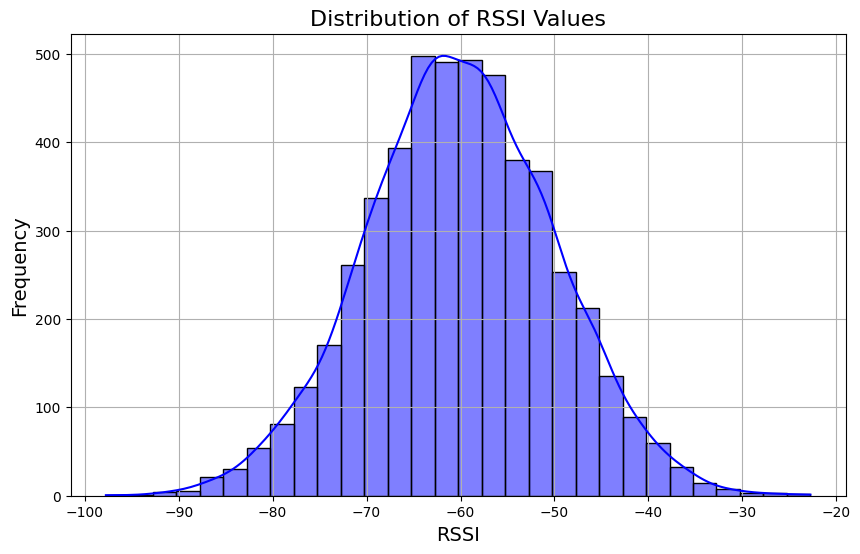

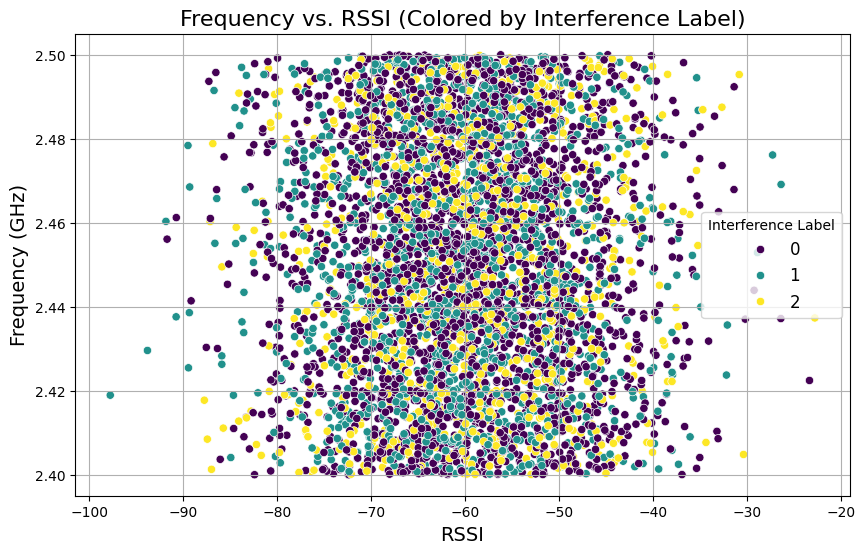

<ipython-input-16-79eb602c1188>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='interference_label', y='interference_level', palette='Set2')


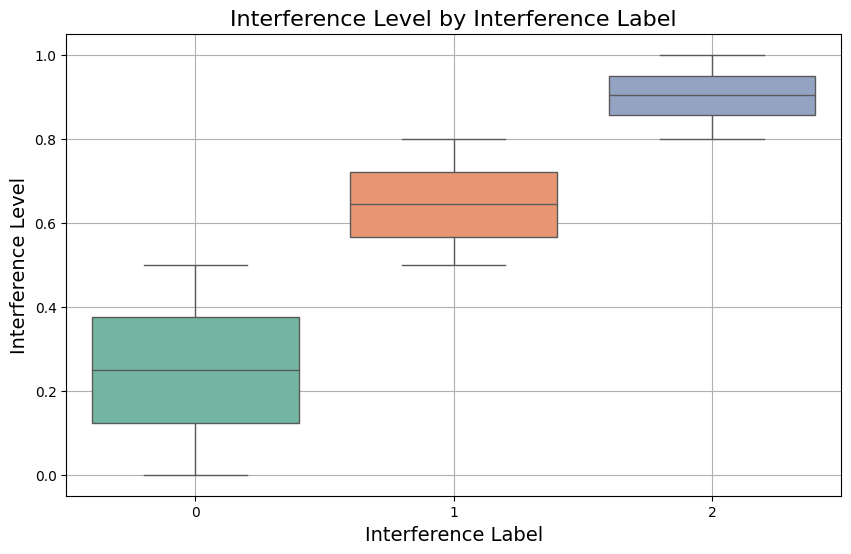

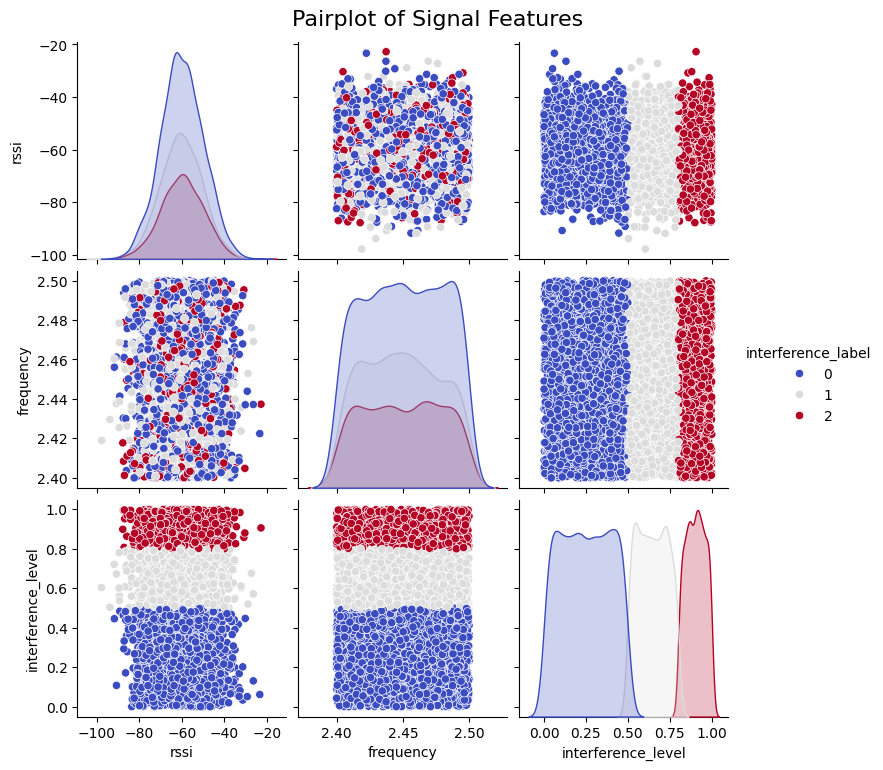


Training Interference Detection Model...
Train Accuracy: 1.0000
Test Accuracy: 0.9990

Example Interference Predictions:
Signal [-55, 2.42, 0.3]: Interference Level = 0
Signal [-70, 2.45, 0.7]: Interference Level = 1
Signal [-80, 2.48, 0.9]: Interference Level = 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Code
def visualize_dataset(dataset):
    """
    Generate visualizations for the drone signal dataset

    :param dataset: Pandas DataFrame containing the drone signal data
    """
    # Histogram of RSSI values
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset['rssi'], kde=True, bins=30, color='blue')
    plt.title('Distribution of RSSI Values', fontsize=16)
    plt.xlabel('RSSI', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

    # Scatter plot of Frequency vs. RSSI
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dataset, x='rssi', y='frequency', hue='interference_label', palette='viridis')
    plt.title('Frequency vs. RSSI (Colored by Interference Label)', fontsize=16)
    plt.xlabel('RSSI', fontsize=14)
    plt.ylabel('Frequency (GHz)', fontsize=14)
    plt.legend(title='Interference Label', fontsize=12)
    plt.grid(True)
    plt.show()

    # Boxplot of interference level by interference label
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataset, x='interference_label', y='interference_level', palette='Set2')
    plt.title('Interference Level by Interference Label', fontsize=16)
    plt.xlabel('Interference Label', fontsize=14)
    plt.ylabel('Interference Level', fontsize=14)
    plt.grid(True)
    plt.show()

    # Pairplot for relationships between features
    sns.pairplot(dataset, hue='interference_label', palette='coolwarm', diag_kind='kde', height=2.5)
    plt.suptitle('Pairplot of Signal Features', y=1.02, fontsize=16)
    plt.show()

# Updated main function
def main():
    # Generate Dataset
    print("Generating Drone Signal Dataset...")
    drone_dataset = DroneSignalDataset(num_samples=5000)

    # Print first few rows of the dataset
    print("\nDataset Preview:")
    print(drone_dataset.dataset.head())

    # Basic Dataset Statistics
    print("\nDataset Statistics:")
    print(drone_dataset.dataset.describe())

    # Interference Label Distribution
    print("\nInterference Label Distribution:")
    interference_dist = drone_dataset.dataset['interference_label'].value_counts(normalize=True) * 100
    print(interference_dist)

    # Visualize Dataset
    print("\nVisualizing Dataset...")
    visualize_dataset(drone_dataset.dataset)

    # Train ML Model for Interference Detection
    print("\nTraining Interference Detection Model...")
    ml_model = DroneSecurityMLModel(drone_dataset)

    # Example Interference Prediction
    print("\nExample Interference Predictions:")
    test_signals = [
        [-55, 2.42, 0.3],  # Low interference
        [-70, 2.45, 0.7],  # Medium interference
        [-80, 2.48, 0.9]   # High interference
    ]

    for signal in test_signals:
        interference_level = ml_model.predict_interference(signal)
        print(f"Signal {signal}: Interference Level = {interference_level}")

if __name__ == '__main__':
    main()
